In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 

In [2]:

path = 'flickr30k_images'
files = os.listdir(path)

In [6]:
files = files[-40:len(files)]

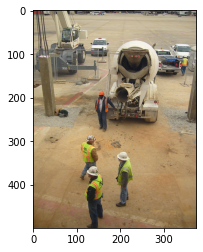

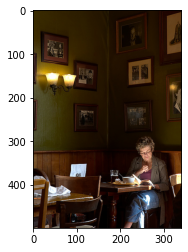

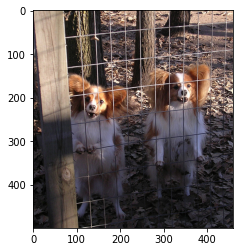

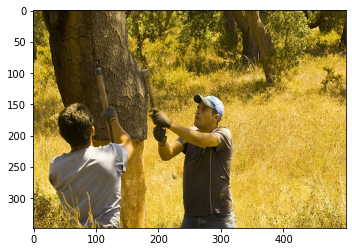

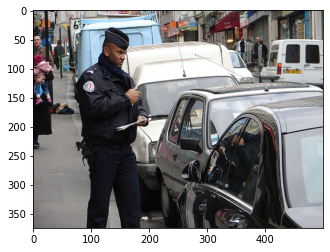

In [7]:
for i in range(5):
    image = plt.imread(f'{path}/{files[i]}')
    plt.imshow(image)
    plt.show()

In [4]:
def add_noise(img):
    image = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)

    return image




args = dict(
            preprocessing_function=add_noise,
           
           )

In [16]:
img_datagen = ImageDataGenerator(**args)
img_datagen2 = ImageDataGenerator()

In [34]:
images  = img_datagen.flow_from_directory(path,
                                          target_size=(250,250),
                                          batch_size=10,
                                         seed = 1)

images2 = img_datagen2.flow_from_directory(path,
                                          target_size=(250,250),
                                          batch_size= 10,
                                          seed = 1)

datagen = zip(images,images2)


Found 31783 images belonging to 1 classes.
Found 31783 images belonging to 1 classes.


In [47]:
xtrain,ytrain = next(datagen)
xtrain[1].shape

(10, 1)

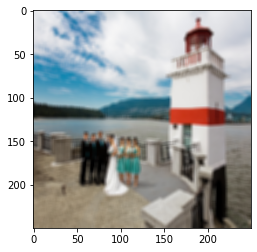

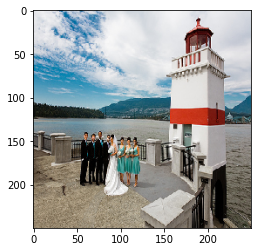

In [36]:
plt.imshow(xtrain[0][0].astype(np.uint8))
plt.show()
plt.imshow(ytrain[0][0].astype(np.uint8))
plt.show()

In [9]:
img_datagen = ImageDataGenerator(**args)
img_datagen2 = ImageDataGenerator()
batch_size = 5
steps_train = len(os.listdir('flickr30k_images/flickr30k_images')) // batch_size

images  = img_datagen.flow_from_directory(path,
                                          target_size=(250,250),
                                          batch_size=batch_size,
                                         seed = 1,
                                         class_mode=None)

images2 = img_datagen2.flow_from_directory(path,
                                          target_size=(250,250),
                                          batch_size= batch_size,
                                          seed = 1,
                                          class_mode = None)

datagen = zip(images,images2)





Found 31783 images belonging to 1 classes.
Found 31783 images belonging to 1 classes.


In [10]:
from model_sequential import model_res
input_size = (250,250,3)
import tensorflow

In [11]:
model = model_res(input_size)
model.compile(loss="mean_squared_logarithmic_error",optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 250, 250, 16)      448       
                                                                 
 conv2d_14 (Conv2D)          (None, 250, 250, 128)     18560     
                                                                 
 conv2d_15 (Conv2D)          (None, 250, 250, 64)      73792     
                                                                 
 conv2d_16 (Conv2D)          (None, 250, 250, 64)      36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 250, 250, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                      

In [13]:
history = model.fit(datagen,
                    steps_per_epoch = steps_train,
                    verbose=1,
                    epochs=4)
                    

Epoch 1/4
 158/6356 [..............................] - ETA: 15:50 - loss: 0.3349 - accuracy: 0.4528

KeyboardInterrupt: 